In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving cruise.csv to cruise.csv


{'cruise.csv': b'Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew\nJourney,Azamara,6,30.276999999999997,6.94,5.94,3.55,42.64,3.55\nQuest,Azamara,6,30.276999999999997,6.94,5.94,3.55,42.64,3.55\nCelebration,Carnival,26,47.262,14.86,7.22,7.43,31.8,6.7\nConquest,Carnival,11,110.0,29.74,9.53,14.88,36.99,19.1\nDestiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.0\nEcstasy,Carnival,22,70.367,20.52,8.55,10.2,34.29,9.2\nElation,Carnival,15,70.367,20.52,8.55,10.2,34.29,9.2\nFantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.2\nFascination,Carnival,19,70.367,20.52,8.55,10.2,34.29,9.2\nFreedom,Carnival,6,110.23899999999999,37.0,9.51,14.87,29.79,11.5\nGlory,Carnival,10,110.0,29.74,9.51,14.87,36.99,11.6\nHoliday,Carnival,28,46.052,14.52,7.27,7.26,31.72,6.6\nImagination,Carnival,18,70.367,20.52,8.55,10.2,34.29,9.2\nInspiration,Carnival,17,70.367,20.52,8.55,10.2,34.29,9.2\nLegend,Carnival,11,86.0,21.24,9.63,10.62,40.49,9.3\nLiberty*,Carnival,8,110.0,29.74,9.51,14.87

In [ ]:
df = spark.read.csv('cruise.csv',inferSchema=True, header = True)

In [ ]:
df.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [ ]:
df.count()

158

In [ ]:
df.describe().show()

+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|summary|Ship_name|Cruise_line|               Age|           Tonnage|       passengers|           length|            cabins|passenger_density|             crew|
+-------+---------+-----------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+
|  count|      158|        158|               158|               158|              158|              158|               158|              158|              158|
|   mean| Infinity|       null|15.689873417721518| 71.28467088607599|18.45740506329114|8.130632911392404| 8.830000000000005|39.90094936708861|7.794177215189873|
| stddev|      NaN|       null| 7.615691058751413|37.229540025907866|9.677094775143416|1.793473548054825|4.4714172221480615| 8.63921711391542|3.503486564627034|
|    min|Adventure|    Azamara|   

In [ ]:
df.groupBy('Ship_name').count().show()

+------------+-----+
|   Ship_name|count|
+------------+-----+
|       Virgo|    1|
|     Fortuna|    1|
|      Shadow|    1|
|     Empress|    1|
|        Wind|    2|
|    Paradise|    1|
|        Surf|    1|
|      Wonder|    1|
|       Magic|    1|
|    Symphony|    1|
|    Sinfonia|    1|
| Inspiration|    1|
|   Millenium|    1|
|    Solstice|    1|
|PrideofAloha|    1|
|     Majesty|    2|
|     Ventura|    1|
|   Romantica|    1|
|      Spirit|    4|
|       Oasis|    1|
+------------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('Cruise_line').count().show()

+-----------------+-----+
|      Cruise_line|count|
+-----------------+-----+
|            Costa|   11|
|              P&O|    6|
|           Cunard|    3|
|Regent_Seven_Seas|    5|
|              MSC|    8|
|         Carnival|   22|
|          Crystal|    2|
|           Orient|    1|
|         Princess|   17|
|        Silversea|    4|
|         Seabourn|    3|
| Holland_American|   14|
|         Windstar|    3|
|           Disney|    2|
|        Norwegian|   13|
|          Oceania|    3|
|          Azamara|    2|
|        Celebrity|   10|
|             Star|    6|
|  Royal_Caribbean|   23|
+-----------------+-----+



In [ ]:
from pyspark.sql.functions import corr
[df.select(corr('crew',column)).show ()for column in df.columns]

+---------------------+
|corr(crew, Ship_name)|
+---------------------+
|                  NaN|
+---------------------+

+-----------------------+
|corr(crew, Cruise_line)|
+-----------------------+
|                   null|
+-----------------------+

+-------------------+
|    corr(crew, Age)|
+-------------------+
|-0.5306565039638852|
+-------------------+

+-------------------+
|corr(crew, Tonnage)|
+-------------------+
| 0.9275698647851732|
+-------------------+

+----------------------+
|corr(crew, passengers)|
+----------------------+
|    0.9152341306065384|
+----------------------+

+------------------+
|corr(crew, length)|
+------------------+
|0.8958566271016579|
+------------------+

+------------------+
|corr(crew, cabins)|
+------------------+
|0.9508226063578497|
+------------------+

+-----------------------------+
|corr(crew, passenger_density)|
+-----------------------------+
|         -0.15550928421699717|
+-----------------------------+

+----------------+
|corr(cr

[None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
# Data preprocessing

from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=["Ship_name","Cruise_line"], outputCols=["Ship_names","Cruise_lines"])
df = indexer.fit(df).transform(df)
df.show()

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+------------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|Ship_names|Cruise_lines|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+------------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|      64.0|        16.0|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|      98.0|        16.0|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|      27.0|         1.0|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|      31.0|         1.0|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|      34.0|         1.0|
|    Ecstasy|   Carnival| 22|   

In [ ]:
from pyspark.sql.functions import round, col
for c in df.columns:
  df = df.withColumn(c ,round(c,2))

df.show()

+---------+-----------+---+-------+----------+------+------+-----------------+----+----------+------------+
|Ship_name|Cruise_line|Age|Tonnage|passengers|length|cabins|passenger_density|crew|Ship_names|Cruise_lines|
+---------+-----------+---+-------+----------+------+------+-----------------+----+----------+------------+
|     null|       null|  6|  30.28|      6.94|  5.94|  3.55|            42.64|3.55|      64.0|        16.0|
|     null|       null|  6|  30.28|      6.94|  5.94|  3.55|            42.64|3.55|      98.0|        16.0|
|     null|       null| 26|  47.26|     14.86|  7.22|  7.43|             31.8| 6.7|      27.0|         1.0|
|     null|       null| 11|  110.0|     29.74|  9.53| 14.88|            36.99|19.1|      31.0|         1.0|
|     null|       null| 17| 101.35|     26.42|  8.92| 13.21|            38.36|10.0|      34.0|         1.0|
|     null|       null| 22|  70.37|     20.52|  8.55|  10.2|            34.29| 9.2|      37.0|         1.0|
|     null|       null| 15| 

In [ ]:
sdf.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew',
 'Ship_names',
 'Cruise_lines']

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['Age','Tonnage','passengers','length','cabins','passenger_density','Ship_names','Cruise_lines'],outputCol="Attributes")
output = assembler.transform(df)

finalized_data = output.select("Attributes","crew")

finalized_data.show()

+--------------------+----+
|          Attributes|crew|
+--------------------+----+
|[6.0,30.276999999...|3.55|
|[6.0,30.276999999...|3.55|
|[26.0,47.262,14.8...| 6.7|
|[11.0,110.0,29.74...|19.1|
|[17.0,101.353,26....|10.0|
|[22.0,70.367,20.5...| 9.2|
|[15.0,70.367,20.5...| 9.2|
|[23.0,70.367,20.5...| 9.2|
|[19.0,70.367,20.5...| 9.2|
|[6.0,110.23899999...|11.5|
|[10.0,110.0,29.74...|11.6|
|[28.0,46.052,14.5...| 6.6|
|[18.0,70.367,20.5...| 9.2|
|[17.0,70.367,20.5...| 9.2|
|[11.0,86.0,21.24,...| 9.3|
|[8.0,110.0,29.74,...|11.6|
|[9.0,88.5,21.24,9...|10.3|
|[15.0,70.367,20.5...| 9.2|
|[12.0,88.5,21.24,...| 9.3|
|[20.0,70.367,20.5...| 9.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
train_data,test_data = finalized_data.randomSplit([0.7,0.3])


In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'Attributes',labelCol='crew')

In [ ]:
#learn to fit the model from training set
lrModel = lr.fit(train_data)

#To predict on testing set
pred = lrModel.evaluate(test_data)

#Predict the model
pred.predictions.show()
  

+--------------------+-----+------------------+
|          Attributes| crew|        prediction|
+--------------------+-----+------------------+
|[5.0,86.0,21.04,9...|  8.0| 9.425402420376626|
|[5.0,160.0,36.34,...| 13.6|15.235456484610397|
|[6.0,93.0,23.94,9...|11.09| 10.76044922752544|
|[6.0,110.23899999...| 11.5|11.299394409199168|
|[7.0,89.6,25.5,9....| 9.87|11.319141341089761|
|[7.0,116.0,31.0,9...| 12.0|12.919091043966507|
|[8.0,110.0,29.74,...| 11.6|12.251881511287479|
|[9.0,90.09,25.01,...| 8.69| 9.427287018792352|
|[9.0,110.0,29.74,...| 11.6|12.139405696167742|
|[9.0,113.0,26.74,...|12.38|11.372155169223529|
|[9.0,116.0,26.0,9...| 11.0|11.318669895568505|
|[10.0,81.76899999...| 8.42| 8.864982946962881|
|[10.0,90.09,25.01...| 8.58| 8.837199337341662|
|[10.0,105.0,27.2,...|10.68| 11.44023257502892|
|[11.0,58.6,15.66,...|  7.6| 7.492506822286755|
|[11.0,91.62700000...|  9.0| 9.333006993222488|
|[11.0,108.977,26....| 12.0|11.296992149403668|
|[12.0,2.329,0.94,...|  0.6|0.3347530846

In [ ]:
lr_model = pred.predictions

x_ax = range(0, lr_model.count())
y_pred = lr_model.select("prediction").collect()
y_orig = lr_model.select("crew").collect()

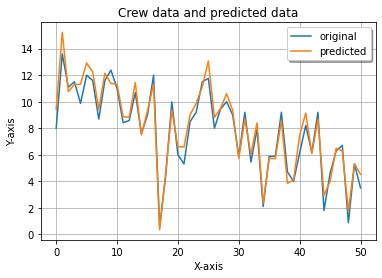

In [ ]:
import matplotlib.pyplot as plt


plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Crew data and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
from pyspark.ml.regression import LinearRegression

print("Coefficients: ", lrModel.coefficients)
print("Intercept: ", lrModel.intercept)

Coefficients:  [-0.01326993764593036,0.008047638817663776,-0.15473299692599785,0.4525934725094404,0.8849375893295364,-0.0043611051401093535,-0.0018198563543666542,0.06838535060834496]
Intercept:  -1.1755833578914037


In [ ]:
  from pyspark.ml.evaluation import RegressionEvaluator

eval = RegressionEvaluator(labelCol="crew",predictionCol="prediction")

#Root Mean Square Error
rmse = eval.evaluate(pred.predictions, {eval.metricName :"rmse"})
print("RMSE : %.3f" % rmse)

#Mean Sqaure Error
mse = eval.evaluate(pred.predictions,{eval.metricName :"mse"})
print("MSE : %.3f" %mse)

#Mean absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE : %.3f" %mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName : "r2"})
print("r2 : %.3f" %r2)

RMSE : 0.722
MSE : 0.521
MAE : 0.598
r2 : 0.946
